In [107]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [108]:
folders = os.listdir(".")
for folder in folders:
    if "LOBPCG" not in folder:
        folders.remove(folder)
print(folders)

['LOBPCG_43_10_5000_10', 'LOBPCG_-1_50_5000_10', 'LOBPCG_-1_100_5000_10', 'LOBPCG_83_10_5000_10', 'LOBPCG_43_32_1000_10', 'LOBPCG_-1_10_5000_10', 'LOBPCG_83_32_1000_10', 'LOBPCG_43_50_5000_10', 'LOBPCG_43_100_5000_10', 'LOBPCG_83_100_5000_10', 'LOBPCG_-1_32_5000_10', 'LOBPCG_83_50_5000_10']


In [109]:
results = {}
for folder in folders:
    results[folder] = []
    files = os.listdir(folder)
    for file in files:
        file_path = os.path.join(folder, file)
        with open(file_path, 'r') as f:
            f.readline()
            f.readline()
            results[folder].append(int(f.readline().strip().split(",")[0]))
print(results)

{'LOBPCG_43_10_5000_10': [19, 16, 16, 16, 16, 16, 16, 16, 16, 16], 'LOBPCG_-1_50_5000_10': [358, 431, 287, 310, 726, 558, 594, 483, 969, 669], 'LOBPCG_-1_100_5000_10': [586, 720, 560, 969, 819, 2580, 894, 1066, 927, 1052], 'LOBPCG_83_10_5000_10': [15, 15, 16, 15, 15, 15, 15, 15, 16, 15], 'LOBPCG_43_32_1000_10': [43, 46, 43, 61, 55, 50, 55, 46, 50, 39], 'LOBPCG_-1_10_5000_10': [89, 51, 74, 56, 56, 89, 64, 51, 74, 51], 'LOBPCG_83_32_1000_10': [58, 49, 47, 48, 53, 49, 54, 50, 49, 92], 'LOBPCG_43_50_5000_10': [72, 89, 81, 79, 58, 79, 67, 65, 108, 66], 'LOBPCG_43_100_5000_10': [252, 214, 127, 135, 330, 201, 116, 165, 186, 196], 'LOBPCG_83_100_5000_10': [250, 199, 160, 441, 214, 235, 303, 274, 177, 168], 'LOBPCG_-1_32_5000_10': [186, 469, 213, 565, 269, 202, 312, 448, 181, 191], 'LOBPCG_83_50_5000_10': [115, 104, 74, 81, 78, 75, 120, 78, 77, 154]}


In [110]:
# matrix sizes
sizes = [10,32,50,100]
sample_sizes = [10**3, 32**3, 50**3, 100**3]
# the 3 casees: LOBPCG no precond, LOBPCG w EUCLID, LOBPCG w. PARGEMSLR
num_setups = 3

data = {}
# convert results so that results for the 3 setups are grouped by size
for size in sizes:
    data[size] = []
    for result in results.items():
        if f"_{str(size)}_" in result[0]:
            params = result[0].split("_")
            setup = params[1]
            data[size].append({setup : result[1]})
print(data)
    

{10: [{'43': [19, 16, 16, 16, 16, 16, 16, 16, 16, 16]}, {'83': [15, 15, 16, 15, 15, 15, 15, 15, 16, 15]}, {'-1': [89, 51, 74, 56, 56, 89, 64, 51, 74, 51]}], 32: [{'43': [43, 46, 43, 61, 55, 50, 55, 46, 50, 39]}, {'83': [58, 49, 47, 48, 53, 49, 54, 50, 49, 92]}, {'-1': [186, 469, 213, 565, 269, 202, 312, 448, 181, 191]}], 50: [{'-1': [358, 431, 287, 310, 726, 558, 594, 483, 969, 669]}, {'43': [72, 89, 81, 79, 58, 79, 67, 65, 108, 66]}, {'83': [115, 104, 74, 81, 78, 75, 120, 78, 77, 154]}], 100: [{'-1': [586, 720, 560, 969, 819, 2580, 894, 1066, 927, 1052]}, {'43': [252, 214, 127, 135, 330, 201, 116, 165, 186, 196]}, {'83': [250, 199, 160, 441, 214, 235, 303, 274, 177, 168]}]}


In [142]:
# Function to calculate appropriate width for a given position in log scale
def calculate_log_width(position, base_width=.8):
    return base_width * position

/tmp/ipykernel_211849/1317393037.py:22: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([0, 2000000])


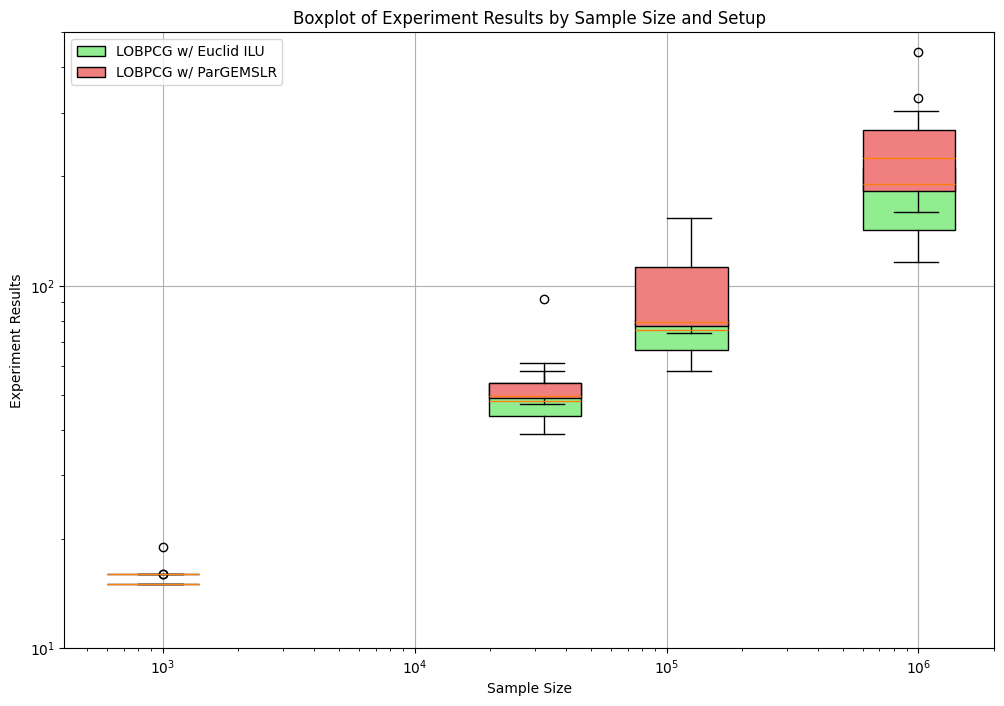

In [164]:
# Calculate means for each sample size and setup
#means = [[np.mean(result) for result in setup_results] for setup_results in results]


plt.figure(figsize=(12, 8))
for sample_size, experiment_configs in data.items():
    for experiment_results in experiment_configs:
        for key, value in experiment_results.items():
            position = sample_size**3
            width = calculate_log_width(position)
            #if key == "-1":
                #plt.boxplot(value, positions=[position], widths=width, patch_artist=True, boxprops=dict(facecolor="lightblue"), label="LOBPCG w/o preconditioner" if sample_size == 10 else "")
            if key == "43":
                plt.boxplot(value, positions=[position], widths=width, patch_artist=True, boxprops=dict(facecolor="lightgreen"), label="LOBPCG w/ Euclid ILU" if sample_size == 10 else "")
            elif key == "83":
                plt.boxplot(value, positions=[position], widths=width, patch_artist=True, boxprops=dict(facecolor="lightcoral"), label="LOBPCG w/ ParGEMSLR" if sample_size == 10 else "")

# Customize plot
plt.xlabel('Sample Size')
plt.ylabel('Experiment Results')
plt.xscale('log')
plt.xlim([0, 2000000])
plt.ylim([10, 500])
plt.yscale("log")
plt.title('Boxplot of Experiment Results by Sample Size and Setup')
plt.legend()

# Show plot
plt.grid(True)
plt.show()


{'-1': [(1000, np.float64(65.5)), (32768, np.float64(303.6)), (125000, np.float64(538.5)), (1000000, np.float64(1017.3))], '43': [(1000, np.float64(16.3)), (32768, np.float64(48.8)), (125000, np.float64(76.4)), (1000000, np.float64(192.2))], '83': [(1000, np.float64(15.2)), (32768, np.float64(54.9)), (125000, np.float64(95.6)), (1000000, np.float64(242.1))]}


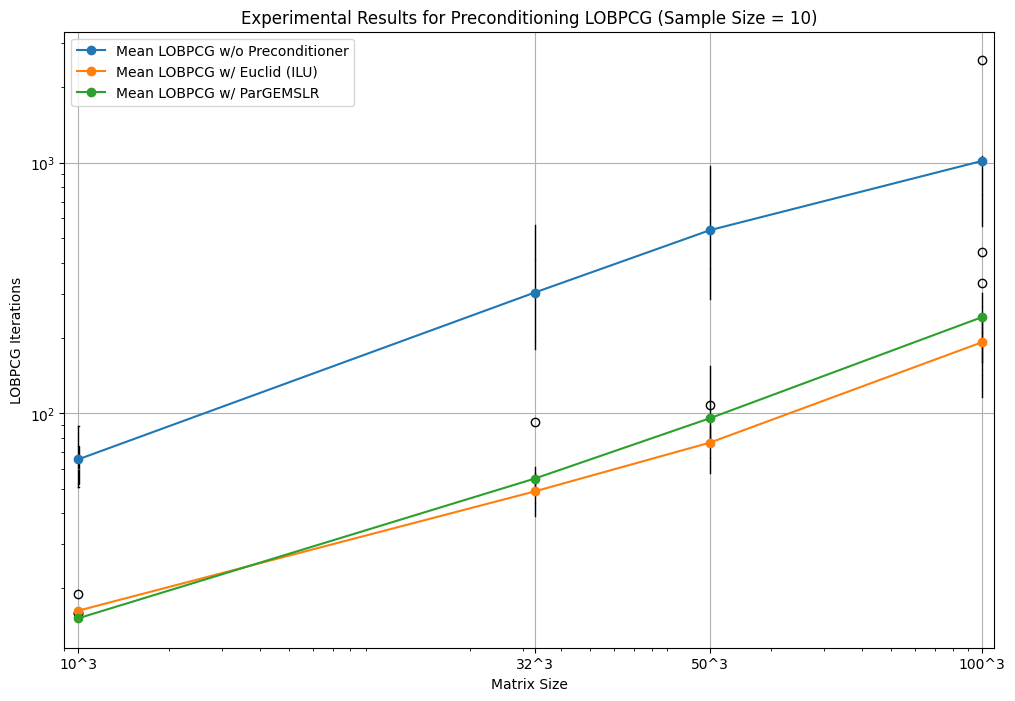

In [166]:
# Store means for plotting lines
mean_values = {'-1': [], '43': [], '83': []}

plt.figure(figsize=(12, 8))
for sample_size, experiment_configs in data.items():
    for experiment_results in experiment_configs:
        for key, value in experiment_results.items():
            if key == "-1":
                plt.boxplot(value, positions=[sample_size**3], widths=10, patch_artist=True, boxprops=dict(facecolor="lightblue"))
                mean_values['-1'].append((sample_size**3, np.mean(value)))
            elif key == "43":
                plt.boxplot(value, positions=[sample_size**3], widths=10, patch_artist=True, boxprops=dict(facecolor="lightgreen"))
                mean_values['43'].append((sample_size**3, np.mean(value)))
            elif key == "83":
                plt.boxplot(value, positions=[sample_size**3], widths=10, patch_artist=True, boxprops=dict(facecolor="lightcoral"))
                mean_values['83'].append((sample_size**3, np.mean(value)))

# Plot mean lines
print(mean_values)
# Plot mean lines with the correct label
for key, means in mean_values.items():
    if key == '-1':
        label = "Mean LOBPCG w/o Preconditioner"
    elif key == '43':
        label = "Mean LOBPCG w/ Euclid (ILU)"
    elif key == '83': 
        label = "Mean LOBPCG w/ ParGEMSLR"
    positions, values = zip(*means)
    plt.plot(positions, values, marker='o', linestyle='-', label=label)


# Customize plot
plt.xlabel('Matrix Size')
plt.ylabel('LOBPCG Iterations')
plt.yscale('log')
plt.xscale('log')
plt.title('Experimental Results for Preconditioning LOBPCG (Sample Size = 10)')
plt.legend()

# Set x-axis range with buffer
min_x = min(sample_size**3 for sample_size in data.keys())
max_x = max(sample_size**3 for sample_size in data.keys())
buffer = (max_x - min_x) * 0.1
plt.xlim(10**3 - 100, max_x + buffer)
custom_labels = {10: '10^3', 32: "32^3", 50: "50^3", 100: "100^3"}
custom_positions = [sample_size**3 for sample_size in custom_labels.keys()]
plt.xticks(custom_positions, custom_labels.values())

# Show plot
plt.grid(True)
plt.show()
